In [9]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Tentukan jumlah cluster, gunakan elbow analisis
* karna data nya terdapat feature categoric dan numerik, maka nya gunakan k-prototype (gabungan dari k-means untuk numerik dan k-modes untuk categoric)

In [12]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

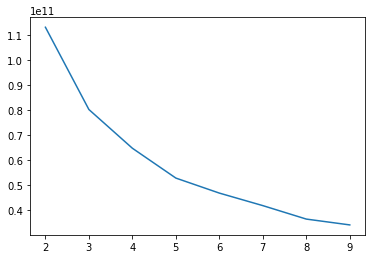

In [13]:
score= []
for i in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=i)
    model.fit(df, categorical=[0,1]) # definisiin columns categoric nya ada dimana
    score.append(model.cost_) # lalu masukkan nilai dari elbow nya dengan cara menghitung cost
plt.plot(range(2,10),score)

# Training
* gunakan hasil dari elbow analisis diatas untuk menentukan jumlah cluster nya

In [14]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0,1])

In [16]:
df_pred = df.copy()
df_pred["cluster"]= member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


setelah dicari oleh mesin melalui mana data nya yang berkumpul, maka nya nanti kita coba analisa sendiri

# Analyze Cluster
lihat aja cluster atau dpr nya

In [17]:
model.cluster_centroids_

[array([[35941.4       ,  6044.45      ,  6288.61666667,  6713.96666667,
          1039.66666667,  3049.46666667],
        [ 8000.04      , 18511.42      , 27573.9       ,  1996.68      ,
         12407.36      ,  2252.02      ],
        [ 8253.46969697,  3824.6030303 ,  5280.45454545,  2572.66060606,
          1773.05757576,  1137.4969697 ]]), array([[1, 3],
        [2, 3],
        [1, 3]], dtype=int64)]

analisis nya perlu dari dua tipe data yaitu categoric dan numerik, kita jadikan aja pandas data frame agar mudah dianalisis

In [27]:
num,cat =model.cluster_centroids_

In [28]:
num.shape

(3, 6)

In [29]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2])
df_num = pd.DataFrame(num, columns=df.columns[2:])
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667
1,2,3,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000
2,1,3,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970


coba bandingin dengan data rata rata kita
* jika kita bandingkan hasil cluster kita dengan data rata rata yang kita punya maka,<br>
untuk cluster 0 : termasuk cluster orang orang yang banyak beli fresh food<br>
untuk cluster 1 : customer suka beli milk, grocery, detergents<br>
untuk cluster 2 : customer yang termasuk hemat<br>

* dari hasil clustering ini bisa membaantu dalam hal analisis data, yang mana nanti nya juga bisa dijadikan bahan untuk bussines
* yang dianalisa clustering ini berdasarkan nilai dpr nya, dengan asumsi udah mewakili data data disekitaran cluster nya

In [30]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

# teknik yang conventional
segmentasi customer hanya dengan memanfaatkan **RFM (Recency, Frequency, Monetary)**
- Recency = Seberapa recent (baru aja melakukan transaksi) 
- Frequency = seberapa sering melakukan transaksi
- Monetary = seberapa besar jumlah transaksi <br>
yang mana hanya tinggal membuat kolom baru sesuai jumlah RFM nya. nanti tinggal cari quantil nya